<a href="https://colab.research.google.com/github/AraksiaGevorgyan/Machine-Learning/blob/main/ChicagoFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/sample_data/Food_Inspections_20240705.csv', encoding='latin1')
print("\nShape of the dataset:", data.shape)
print("\nData types:\n", data.dtypes)
print("\nMissing values:\n", data.isnull().sum())
data.head()


Shape of the dataset: (8545, 17)

Data types:
 Inspection ID        int64
DBA Name            object
AKA Name            object
License #            int64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
dtype: object

Missing values:
 Inspection ID         0
DBA Name              0
AKA Name             44
License #             0
Facility Type       107
Risk                  4
Address               0
City                 14
State                 6
Zip                   1
Inspection Date       0
Inspection Type       0
Results               1
Violations         5523
Latitude             57
Longitude            57
Location             57
dtype: int64


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2596951,T & A FOOD,T & A FOOD,2891386,Grocery Store,Risk 3 (Low),2501 W 63RD ST,CHICAGO,IL,60629.0,07/02/2024,Canvass,Out of Business,NaN,41.779113,-87.686150,"(41.779112711099536, -87.68614996112841)"
1,2596936,SWEETGREEN,SWEETGREEN,2469294,Restaurant,Risk 1 (High),621 N STATE ST,CHICAGO,IL,60654.0,07/02/2024,Canvass,Pass,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.893228,-87.627971,"(41.893227603829246, -87.62797142536463)"
2,2596943,FLAME'S GRILL INC,SHARKS,2781091,Restaurant,Risk 2 (Medium),10255 S WESTERN AVE,CHICAGO,IL,60643.0,07/02/2024,Canvass,Out of Business,NaN,41.706583,-87.681481,"(41.70658293299433, -87.68148089347167)"
3,2596881,TASTE OF JAPAN,TASTE OF JAPAN,2972386,Restaurant,Risk 1 (High),201 N WELLS ST,CHICAGO,IL,60606.0,07/01/2024,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.885759,-87.633784,"(41.885758730147366, -87.63378404961261)"
4,2596873,"NADIA FISH & CHICKEN, INC","NADIA FISH & CHICKEN, INC",1985943,Restaurant,Risk 2 (Medium),2704 E 75TH ST,CHICAGO,IL,60649.0,07/01/2024,Complaint,Pass,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.760060,-87.558490,"(41.760059860189635, -87.55848986206058)"


**Handle Missing Values**

In [ ]:
# Drop rows with missing 'results' as it's critical for classification
data = data.dropna(subset=['Results'])

# Fill missing 'violations' with a placeholder
data['Violations'].fillna('No violations', inplace=True)

# Fill missing 'facility_type' with 'Unknown' (or any other suitable placeholder)
data['Facility Type'].fillna('Unknown', inplace=True)

# Check missing values again
print("Missing values after handling:\n", data.isnull().sum())


Missing values after handling:
 Inspection ID       0
DBA Name            0
AKA Name           44
License #           0
Facility Type       0
Risk                4
Address             0
City               14
State               6
Zip                 1
Inspection Date     0
Inspection Type     0
Results             0
Violations          0
Latitude           56
Longitude          56
Location           56
dtype: int64


**Handle Outliers**


> Interquartile Range (IQR) Method
The interquartile range (IQR) is a measure of the dispersion of a dataset. It is calculated by taking the difference between the upper and lower quartiles of the dataset. Quartiles are values that divide a dataset into four equal parts or quarters. The upper quartile (Q3) is the value greater than or equal to 75% of the other values in the dataset, and the lower quartile (Q1) is the value greater than or equal to 25% of the other values. The IQR is calculated by subtracting Q1 from Q3.



> Using IQR, we can define a dataset's upper and lower bounds. The upper bound is defined as Q3 + 1.5*IQR, and the lower bound is defined as Q1 - 1.5*IQR. Any observations or data points that reside beyond and outside these bounds can be considered outliers.




In [ ]:
# Handling Outliers
# For numeric columns, use IQR to filter out outliers

numeric_cols = data.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]

print("Shape after removing outliers:", data.shape)


Shape after removing outliers: (6072, 17)


In [ ]:
# Convert Data Types
# Converting date columns to datetime
data['Inspection Date'] = pd.to_datetime(data['Inspection Date'])

# Verify data types
print("Data types after conversion:\n", data.dtypes)


Data types after conversion:
 Inspection ID               int64
DBA Name                   object
AKA Name                   object
License #                   int64
Facility Type              object
Risk                       object
Address                    object
City                       object
State                      object
Zip                       float64
Inspection Date    datetime64[ns]
Inspection Type            object
Results                    object
Violations                 object
Latitude                  float64
Longitude                 float64
Location                   object
dtype: object


**Handle Categorical Variables**

* Convert categorical variables into numerical values using techniques like one-hot encoding.



In [ ]:
# Target Binary Classification (Pass/Fail)
data['Results'] = data['Results'].apply(lambda x: 1 if x == 'Pass' else 0)
data['Results'].value_counts()
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2596951,T & A FOOD,T & A FOOD,2891386,558,477.0,2501 W 63RD ST,CHICAGO,IL,60629.0,2024-07-02,2473,0,No violations,41.779113,-87.686150,"(41.779112711099536, -87.68614996112841)"
1,2596936,SWEETGREEN,SWEETGREEN,2469294,4382,4591.0,621 N STATE ST,CHICAGO,IL,60654.0,2024-07-02,2473,1,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.893228,-87.627971,"(41.893227603829246, -87.62797142536463)"
3,2596881,TASTE OF JAPAN,TASTE OF JAPAN,2972386,4382,4591.0,201 N WELLS ST,CHICAGO,IL,60606.0,2024-07-01,1186,0,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.885759,-87.633784,"(41.885758730147366, -87.63378404961261)"
4,2596873,"NADIA FISH & CHICKEN, INC","NADIA FISH & CHICKEN, INC",1985943,4382,994.0,2704 E 75TH ST,CHICAGO,IL,60649.0,2024-07-01,403,1,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.760060,-87.558490,"(41.760059860189635, -87.55848986206058)"
5,2596839,"GEE GEE FOOD MART, LTD","GEE GEE FOOD MART, LTD",2934594,4382,4591.0,3906 W ROOSEVELT RD,CHICAGO,IL,60624.0,2024-07-01,2473,0,No violations,41.866312,-87.723032,"(41.86631164119278, -87.72303226414533)"


In [ ]:
# Derive New Features
data['violation_count'] = data['Violations'].apply(lambda x: 0 if x == 'No violations' else x.count('|') + 1)

# Check the first few rows to confirm the change
data.head()


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,violation_count
0,2596951,T & A FOOD,T & A FOOD,2891386,558,477.0,2501 W 63RD ST,CHICAGO,IL,60629.0,2024-07-02,2473,0,No violations,41.779113,-87.686150,"(41.779112711099536, -87.68614996112841)",0
1,2596936,SWEETGREEN,SWEETGREEN,2469294,4382,4591.0,621 N STATE ST,CHICAGO,IL,60654.0,2024-07-02,2473,1,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.893228,-87.627971,"(41.893227603829246, -87.62797142536463)",2
3,2596881,TASTE OF JAPAN,TASTE OF JAPAN,2972386,4382,4591.0,201 N WELLS ST,CHICAGO,IL,60606.0,2024-07-01,1186,0,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.885759,-87.633784,"(41.885758730147366, -87.63378404961261)",1
4,2596873,"NADIA FISH & CHICKEN, INC","NADIA FISH & CHICKEN, INC",1985943,4382,994.0,2704 E 75TH ST,CHICAGO,IL,60649.0,2024-07-01,403,1,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.760060,-87.558490,"(41.760059860189635, -87.55848986206058)",4
5,2596839,"GEE GEE FOOD MART, LTD","GEE GEE FOOD MART, LTD",2934594,4382,4591.0,3906 W ROOSEVELT RD,CHICAGO,IL,60624.0,2024-07-01,2473,0,No violations,41.866312,-87.723032,"(41.86631164119278, -87.72303226414533)",0


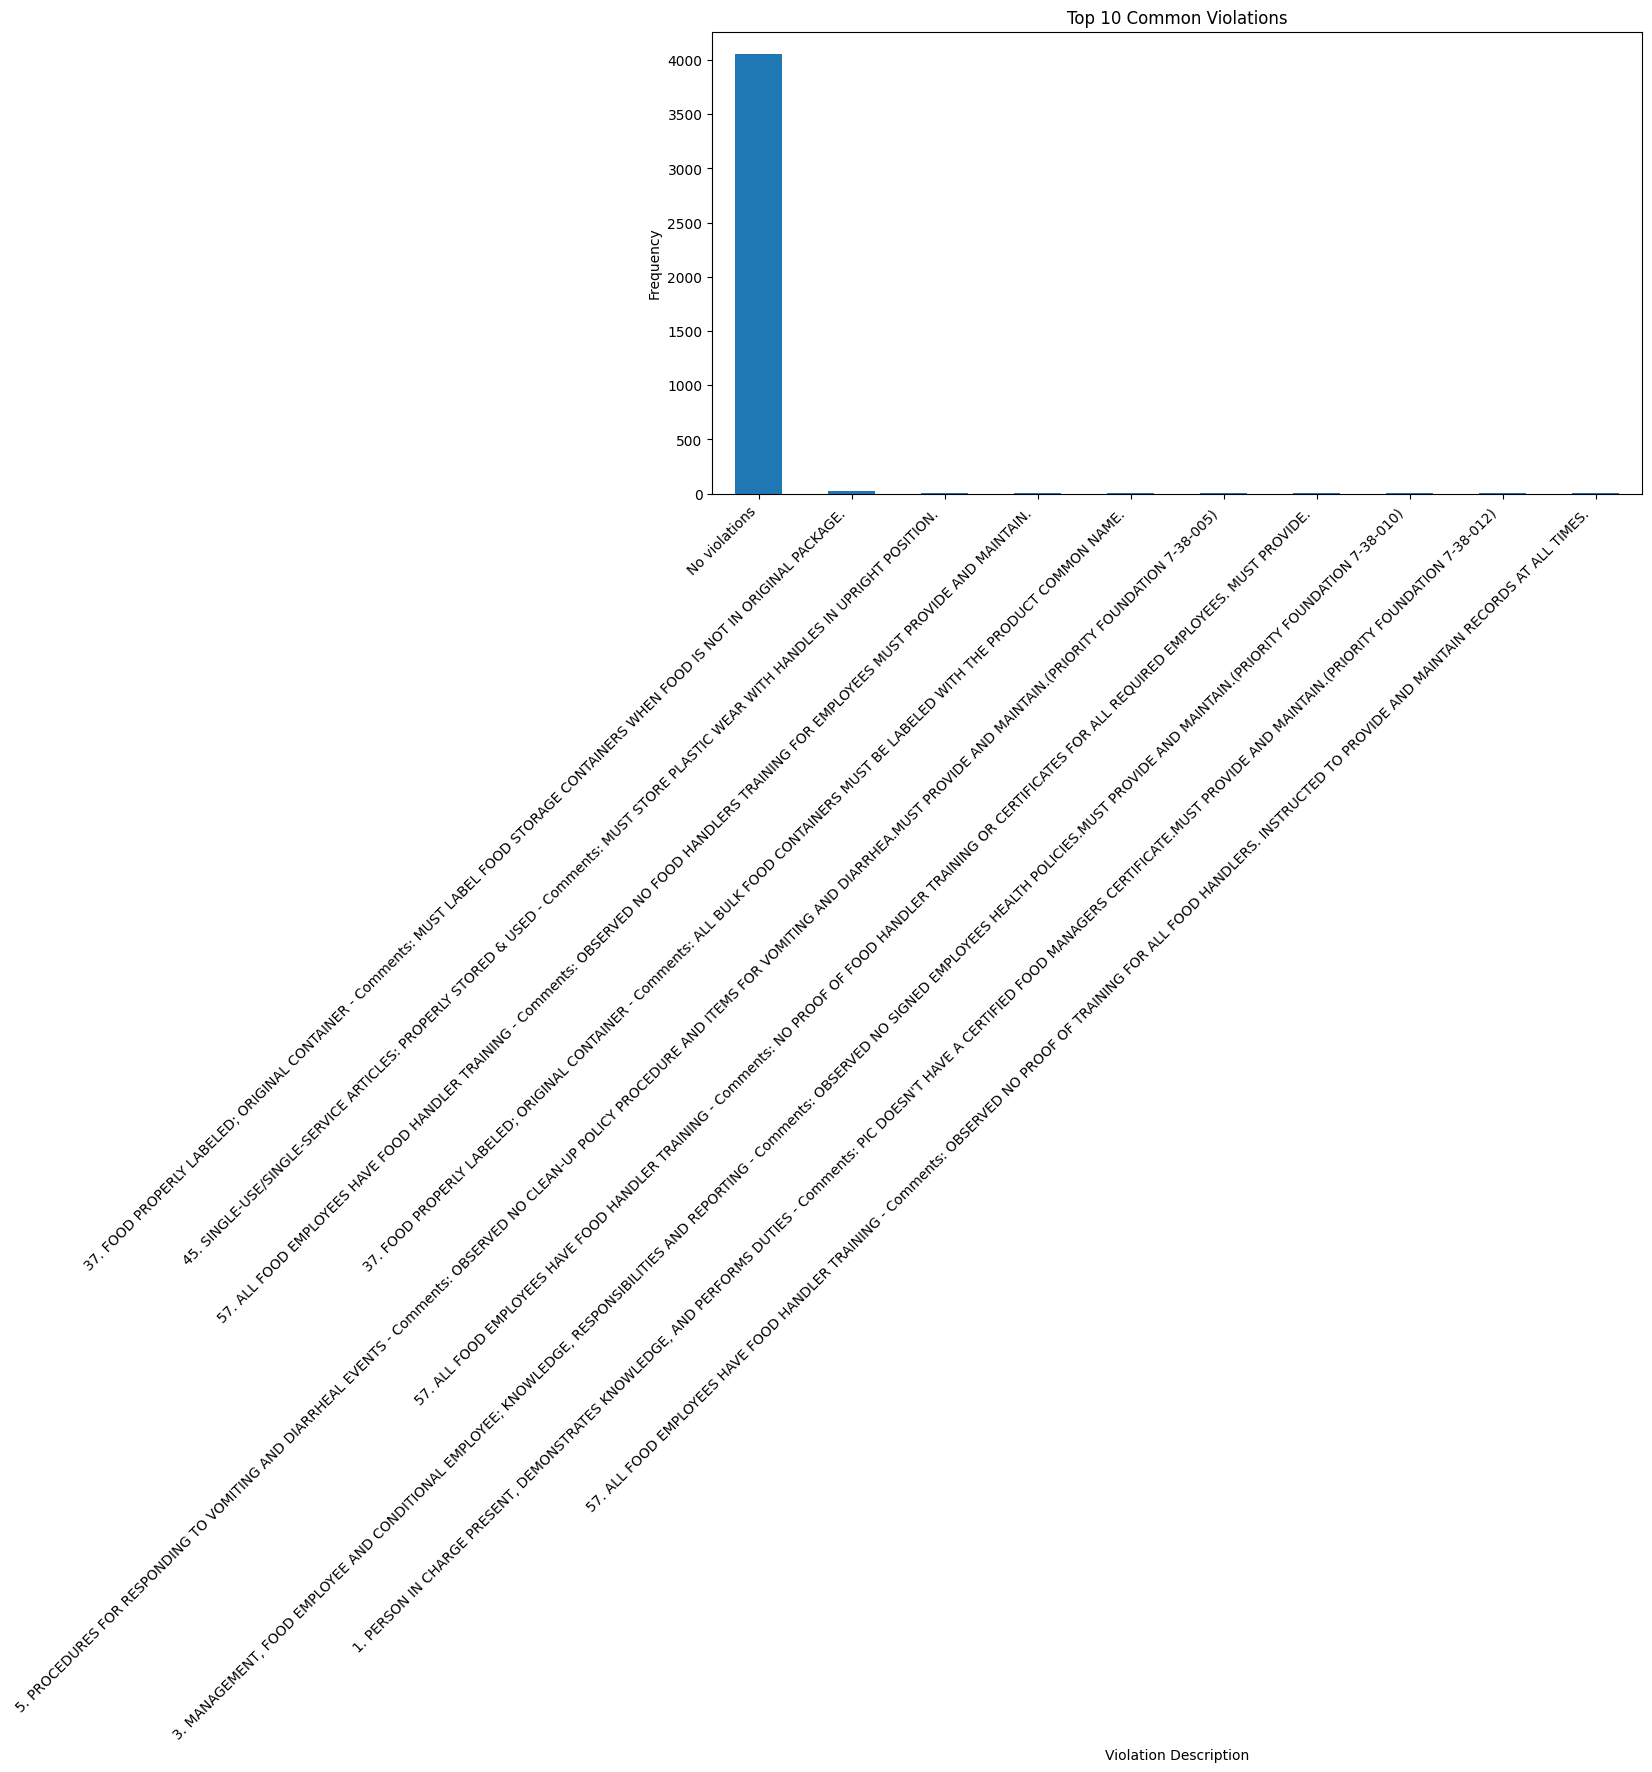

In [ ]:
# Common Violations
violations_series = data['Violations'].str.split('|').apply(pd.Series).stack()
common_violations = violations_series.value_counts().head(10)

plt.figure(figsize=(12, 6))
common_violations.plot(kind='bar')
plt.title('Top 10 Common Violations')
plt.xlabel('Violation Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

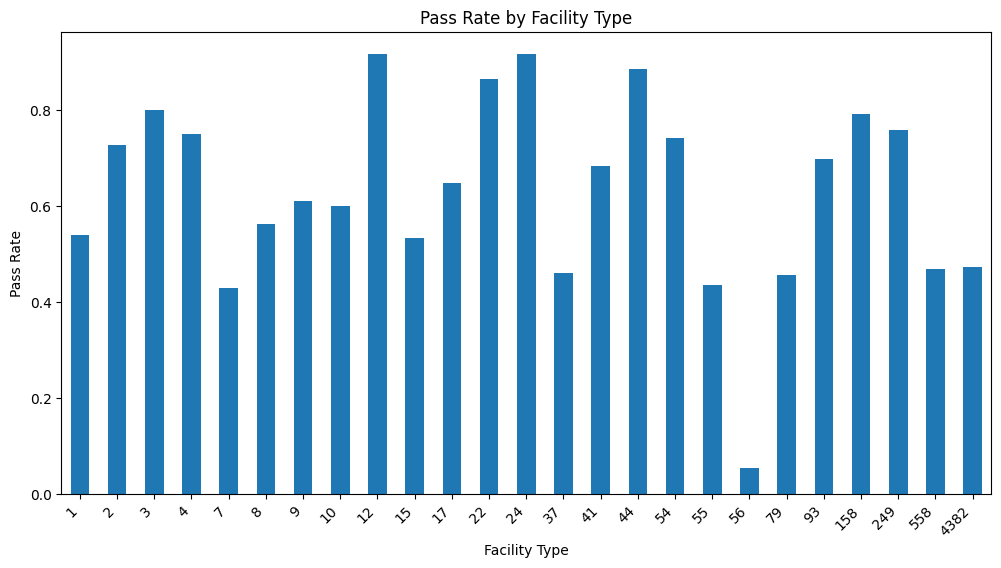

In [ ]:
# Factors Influencing Results: Facility Type
plt.figure(figsize=(12, 6))
data.groupby('Facility Type')['Results'].mean().plot(kind='bar')
plt.title('Pass Rate by Facility Type')
plt.xlabel('Facility Type')
plt.ylabel('Pass Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

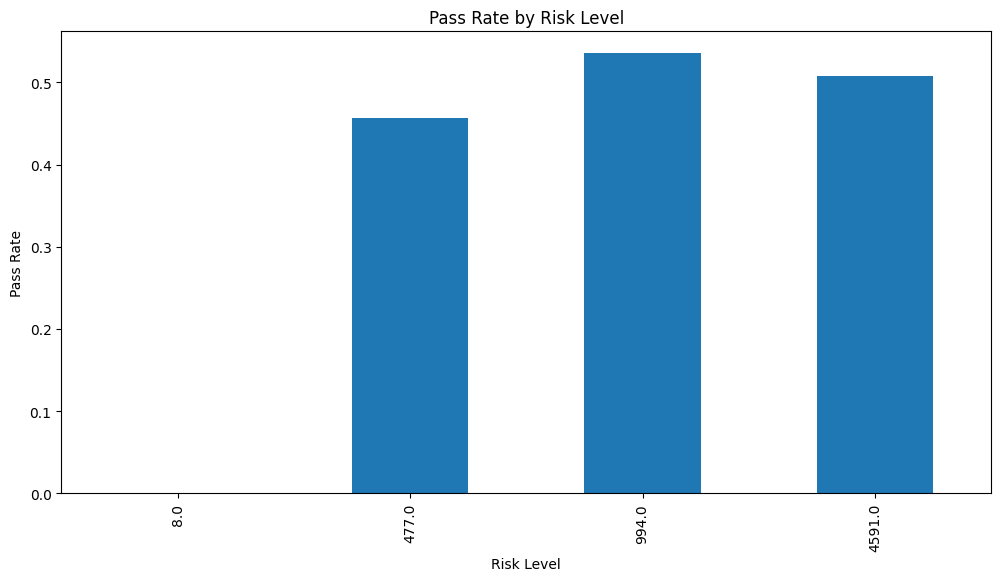

In [ ]:
# Factors Influencing Results: Risk Level
plt.figure(figsize=(12, 6))
data.groupby('Risk')['Results'].mean().plot(kind='bar')
plt.title('Pass Rate by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Pass Rate')
plt.show()

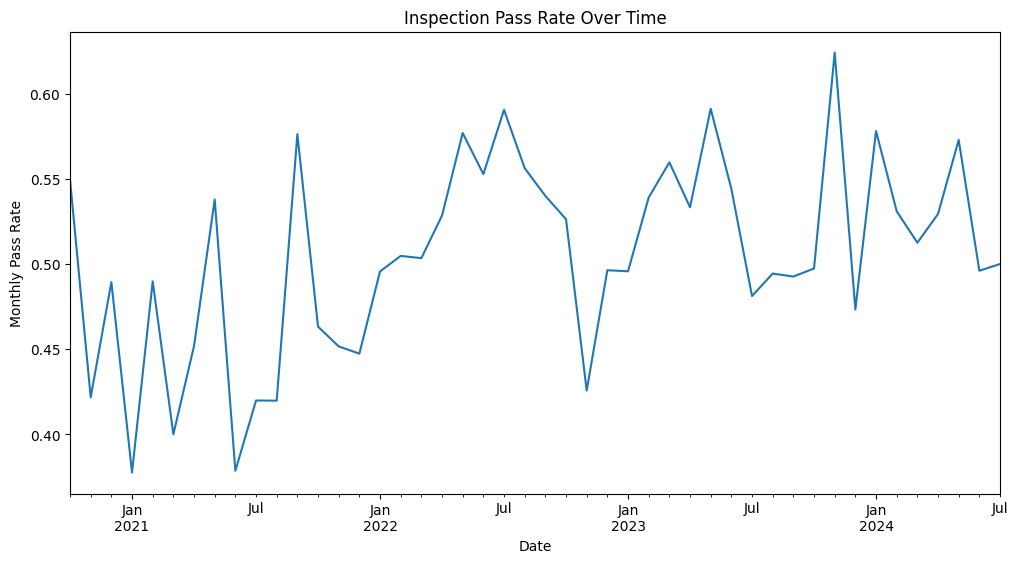

In [ ]:
plt.figure(figsize=(12, 6))
data.set_index('Inspection Date')['Results'].resample('M').mean().plot()
plt.title('Inspection Pass Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Pass Rate')
plt.show()

In [ ]:
data.dtypes

Inspection ID               int64
DBA Name                   object
AKA Name                   object
License #                   int64
Facility Type               int64
Risk                      float64
Address                    object
City                       object
State                      object
Zip                       float64
Inspection Date    datetime64[ns]
Inspection Type             int64
Results                     int64
Violations                 object
Latitude                  float64
Longitude                 float64
Location                   object
violation_count             int64
dtype: object

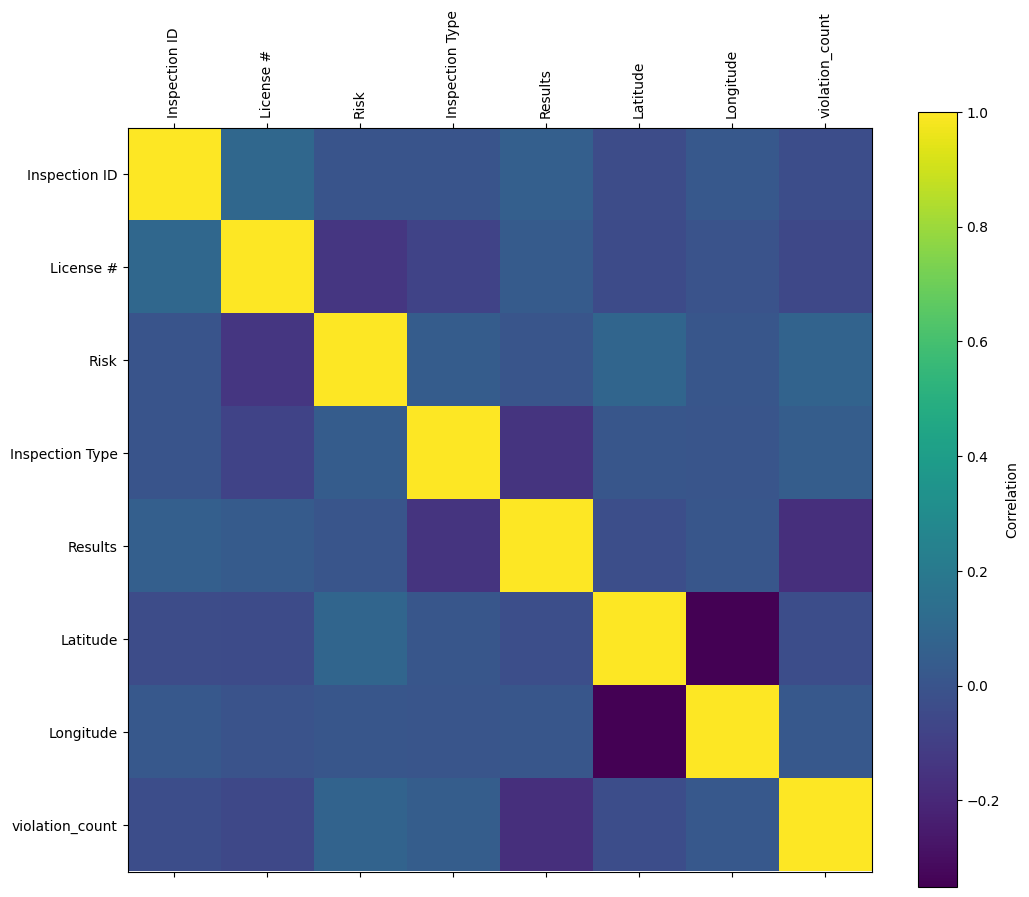

In [ ]:
numeric_columns = ['Inspection ID', 'License #', 'Risk', 'Inspection Type', 'Results', 'Latitude', 'Longitude', 'violation_count']
numeric_data = data[numeric_columns]
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
plt.matshow(corr_matrix, fignum=1)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar(label='Correlation')
plt.show()

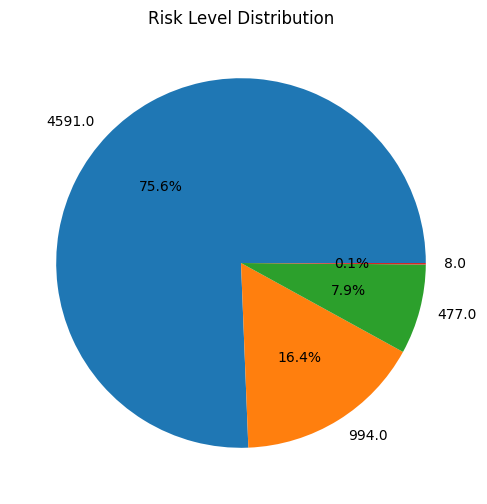

In [ ]:
plt.figure(figsize=(12, 6))
data['Risk'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Risk Level Distribution')
plt.ylabel('')
plt.show()

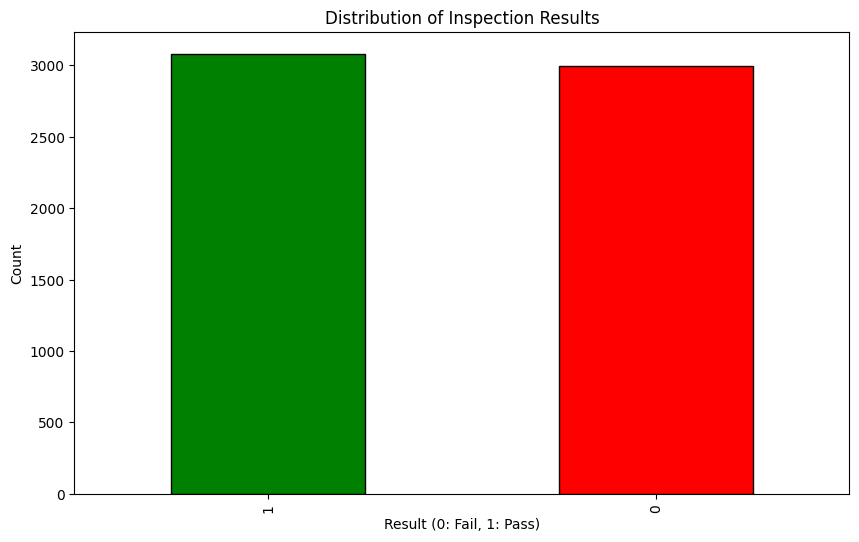

In [ ]:



plt.figure(figsize=(10, 6))
data['Results'].value_counts().plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.title('Distribution of Inspection Results')
plt.xlabel('Result (0: Fail, 1: Pass)')
plt.ylabel('Count')
plt.show()


In [ ]:
data[['Facility Type', 'Risk', 'Inspection Type']]

,Facility Type,Risk,Inspection Type
0,558,477.0,2473
1,4382,4591.0,2473
3,4382,4591.0,1186
4,4382,994.0,403
5,4382,4591.0,2473
...,...,...,...
7352,4382,4591.0,278
7353,4382,4591.0,1186
7360,4382,4591.0,403
7374,4382,4591.0,2473


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

x = data[['Facility Type', 'Risk', 'Inspection Type']]
y = data['Results']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Impute missing values with the mean (you can choose another strategy like 'median' or 'most_frequent')
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the decision tree regressor
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_imputed, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_imputed, y_train)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_imputed, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (4250, 3)
Test set shape: (1822, 3)


In [ ]:
# Logistic Regression Evaluation
y_pred_logreg = logreg.predict(X_test_imputed)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_logreg))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_logreg))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_pred_logreg),end = '\n\n')

# Decision Tree Evaluation
y_pred_dtree = dtree.predict(X_test_imputed)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dtree))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dtree))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_pred_dtree),end = '\n\n')

# Random Forest Evaluation
y_pred_rf = rf.predict(X_test_imputed)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_rf),end = '\n\n')

Logistic Regression Accuracy: 0.5439077936333699
Logistic Regression Precision: 0.5314757481940144
Logistic Regression Recall: 0.577354260089686
Logistic Regression ROC-AUC: 0.5445911085394667

Decision Tree Accuracy: 0.7228320526893524
Decision Tree Precision: 0.8115942028985508
Decision Tree Recall: 0.5650224215246636
Decision Tree ROC-AUC: 0.7196079849558802

Random Forest Accuracy: 0.7195389681668496
Random Forest Precision: 0.8009478672985783
Random Forest Recall: 0.5683856502242153
Random Forest ROC-AUC: 0.7164508896282367



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = dtree.predict(X_test_imputed)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_logreg)
mse = mean_squared_error(y_test, y_pred_logreg)
r2 = r2_score(y_test, y_pred_logreg)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 0.46
Mean Squared Error: 0.46
R-squared: -0.83
